<a href="https://colab.research.google.com/github/Sayed-Husain/Bitcoin-price-prediction/blob/main/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting - Bitcoin Predcition Project

This project is to display time forcasting skills and is not meant to be used to take financial decesions based on it's output

## Get data

There are multiable ways to get the Bitcoin prices data, including using the [marketwatch website](https://www.marketwatch.com/investing/cryptocurrency/btcusd/download-data), but for this notebook, I will use the [cryptocmd library](https://github.com/guptarohit/cryptoCMD).

In [1]:
# install crytocmd package in colab
!pip install cryptocmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
from cryptocmd import CmcScraper
# initialise scraper without time interval
scraper = CmcScraper("BTC")
# Pandas dataFrame for the same data
df = scraper.get_dataframe(date_as_index=True)

In [3]:
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2022-10-22,19172.380609,19248.067672,19132.243193,19208.190246,1.610444e+10,3.685413e+11
2022-10-21,19053.203046,19237.385606,18770.970061,19172.469217,3.245929e+10,3.678398e+11
2022-10-20,19138.085057,19315.198969,18971.458649,19053.740241,2.449397e+10,3.655430e+11
2022-10-19,19335.026441,19348.416810,19127.688370,19139.534351,2.242539e+10,3.671716e+11
2022-10-18,19550.466743,19666.995006,19144.770176,19334.415150,3.058001e+10,3.708917e+11
...,...,...,...,...,...,...
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3465 entries, 2022-10-22 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3465 non-null   float64
 1   High        3465 non-null   float64
 2   Low         3465 non-null   float64
 3   Close       3465 non-null   float64
 4   Volume      3465 non-null   float64
 5   Market Cap  3465 non-null   float64
dtypes: float64(6)
memory usage: 189.5 KB


In [5]:
# How many values do we have
len(df)

3465

In [6]:
# Create a new DataFrame with only the closing price
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close":"Price"}).iloc[::-1]
bitcoin_prices.head(10)

,Price
Date,
2013-04-28,134.210007
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000
2013-05-04,112.500000
2013-05-05,115.910004
2013-05-06,112.300003


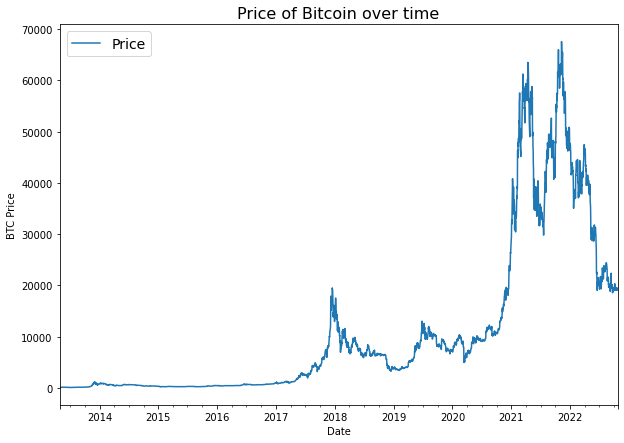

In [7]:
# Visualize the prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin over time", fontsize=16)
plt.legend(fontsize=14);

In [8]:
df.index.dtype

dtype('<M8[ns]')

## Create train and test datasets

In [9]:
# Create X and y variables
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()
timestamps[:5], prices[:5]

(array(['2013-04-28T00:00:00.000000000', '2013-04-29T00:00:00.000000000',
        '2013-04-30T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
        '2013-05-02T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([134.21000671, 144.53999329, 139.        , 116.98999786,
        105.20999908]))

In [10]:
# Create train and test splits for time series data
split_size = int(0.85 * len(prices)) # to identify the 85% 

# Create train data splits (everything before the split)
X_train, y_train = timestamps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timestamps[split_size:], prices[split_size:]

# Confirm split
len(X_train), len(X_test), len(y_train), len(y_test)

(2945, 520, 2945, 520)

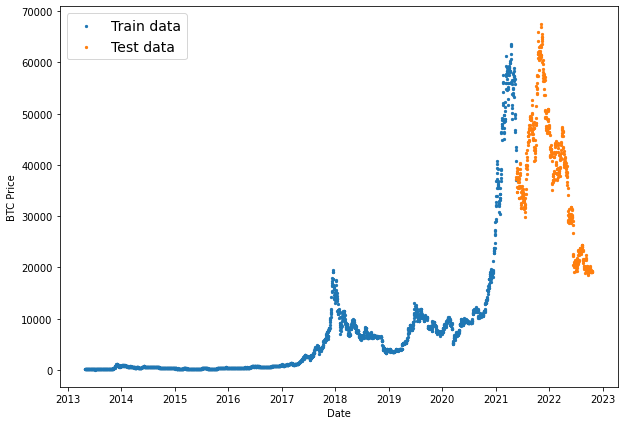

In [11]:
# Plot made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [12]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

## Model 0: Naïve forecast (baseline)

In [13]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value

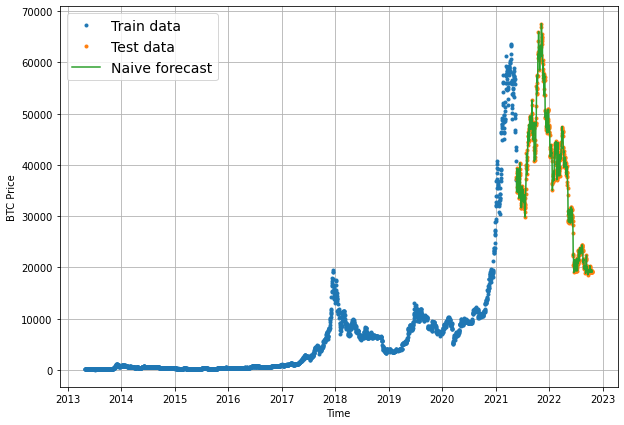

In [14]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

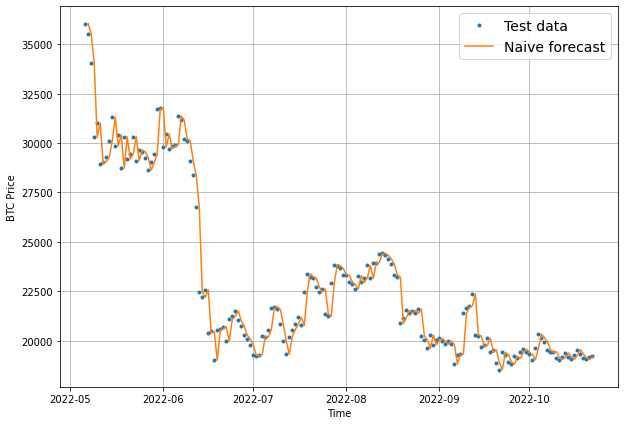

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, start=350, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=350, label="Naive forecast");

## Evaluating a time series model

In [16]:
import tensorflow as tf

Let's create a function to caculate MASE (mean absolute scaled error).

MASE equals 1 for the naive forecast (or very close to 1). A forecast which performs better than the naïve should get <1 MASE.	

In [17]:
def mean_absolute_scaled_error(y_true, y_pred):
  # Get mae
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [18]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for preds with horizons higher than 1
  if mae.ndim > 0: 
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [19]:
# Evaluate the baseline
model_0_results = evaluate_preds(y_true = y_test[1:],
                                 y_pred = naive_forecast)

model_0_results

{'mae': 975.8179,
 'mse': 1922027.6,
 'rmse': 1386.3721,
 'mape': 2.5841565,
 'mase': 0.9985305}

## Format Data: Windowing our datset

In [20]:
# Setup global variables for window and horizon size
HORIZON = 1 # Number of prices to predict per window
WINDOW_SIZE = 7 # Number of prices to use to have a predictions

In [21]:
# Create a function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """

  return x[:, :-horizon], x[:, -horizon:] # Window, Label

In [22]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))

print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


Now we have created a function to create a window and a label given a sequence, it is time to create a function to make windows for an entire time series.

Let's write a function which:

1. Creates a window step of specific window size, for example: `[[0, 1, 2, 3, 4, 5, 6, 7]]`
2. Uses NumPy indexing to create a 2D of multiple window steps, for example 

```
[[0, 1, 2, 3, 4, 5, 6, 7],
[1, 2, 3, 4, 5, 6, 7, 8],
[2, 3, 4, 5, 6, 7, 8, 9]]
```

3. Uses the 2D array of multuple window steps to index on a target series
4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [23]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps 
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # minus 1 to account for 0 indexing

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [24]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3458, 3458)

In [25]:
# View the first 3 windows and labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [134.21000671 144.53999329 139.         116.98999786 105.20999908
  97.75       112.5       ] -> Label: [115.91000366]
Window: [144.53999329 139.         116.98999786 105.20999908  97.75
 112.5        115.91000366] -> Label: [112.30000305]
Window: [139.         116.98999786 105.20999908  97.75       112.5
 115.91000366 112.30000305] -> Label: [111.5]


In [26]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.15):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [27]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2939, 519, 2939, 519)

## Make a modelling checkpoint callback
Create a modelling checkpoint so that we can keep track of each model best performance


In [28]:
import os
# Create a function to create model checkpoint 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense Model (window = 7, horizon = 1) 

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
model_1.fit(x=train_windows, 
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
23/23 [==============================] - 2s 43ms/step - loss: 1303.4124 - mae: 1303.4124 - mse: 11321084.0000 - val_loss: 1892.3521 - val_mae: 1892.3521 - val_mse: 6203965.0000
Epoch 2/100
23/23 [==============================] - 1s 42ms/step - loss: 384.0238 - mae: 384.0238 - mse: 943816.5000 - val_loss: 1533.4370 - val_mae: 1533.4370 - val_mse: 4353499.0000
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 320.1943 - mae: 320.1943 - mse: 765237.5625 - val_loss: 1744.8617 - val_mae: 1744.8617 - val_mse: 5255494.5000
Epoch 4/100
23/23 [==============================] - 1s 45ms/step - loss: 316.0443 - mae: 316.0443 - mse: 732801.6875 - val_loss: 1439.2190 - val_mae: 1439.2190 - val_mse: 3894435.5000
Epoch 5/100
23/23 [==============================] - 1s 40ms/step - loss: 295.1435 - mae: 295.1435 - mse: 640407.6250 - val_loss: 1349.9573 - val_mae: 1349.9573 - val_mse: 3349133.2500
Epoch 6/100
23/23 [==============================] - 1s 47ms/step - loss

In [30]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1001.0179 - mae: 1001.0179 - mse: 2015773.7500


[1001.0179443359375, 1001.0179443359375, 2015773.75]

## Making forecasts with a model (on the test dataset)



In [31]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [32]:
# Make predictions using model_1 on the test dataset
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

17/17 [==============================] - 0s 2ms/step


(519, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([37490.49 , 37393.48 , 34757.65 , 38035.883, 38373.945, 39395.676,
        38612.38 , 36270.195, 34649.203, 35296.09 ], dtype=float32)>)

In [33]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1001.01807,
 'mse': 2015773.6,
 'rmse': 1419.7794,
 'mape': 2.6634963,
 'mase': 1.0243173}

In [34]:
model_0_results

{'mae': 975.8179,
 'mse': 1922027.6,
 'rmse': 1386.3721,
 'mape': 2.5841565,
 'mase': 0.9985305}

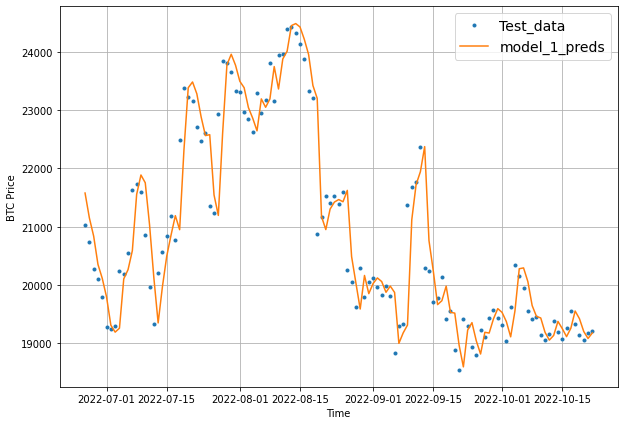

In [35]:
offset = 400
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [36]:
HORIZON = 1
WINDOW_SIZE = 30

In [37]:
# Make windowed data with approriate horizon and window sizes
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(3435, 3435)

In [38]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2919, 516, 2919, 516)

In [39]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [40]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1084.3678


1084.3677978515625

In [41]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

17/17 [==============================] - 0s 2ms/step


{'mae': 1084.3678,
 'mse': 2277105.0,
 'rmse': 1509.0079,
 'mape': 2.8915205,
 'mase': 1.118661}

In [42]:
model_1_results

{'mae': 1001.01807,
 'mse': 2015773.6,
 'rmse': 1419.7794,
 'mape': 2.6634963,
 'mase': 1.0243173}

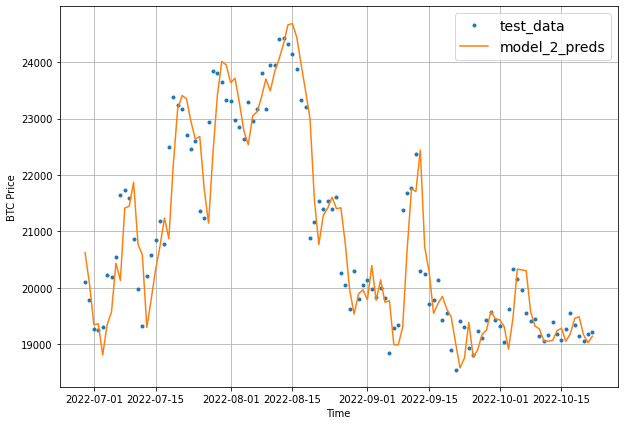

In [43]:
offset = 400
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="test_data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds") 

## Model 3: Dense (window = 30, horizon = 7)

In [44]:
HORIZON = 7
WINDOW_SIZE = 30

In [45]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(3429, 3429)

In [46]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2914, 515, 2914, 515)

In [47]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [48]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 18ms/step - loss: 2008.6445


2008.64453125

In [49]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

17/17 [==============================] - 0s 2ms/step


{'mae': 2008.6443,
 'mse': 7724406.5,
 'rmse': 2303.9243,
 'mape': 5.4181447,
 'mase': 2.0527787}

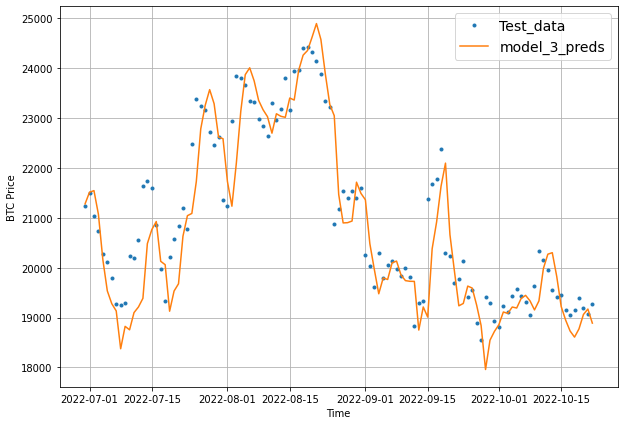

In [50]:
offset = 400
plt.figure(figsize=(10, 7))

# Plot the true values
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")

# Plot predictions
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), # the values are condensed
                 format="-",
                 start=offset, 
                 label="model_3_preds")

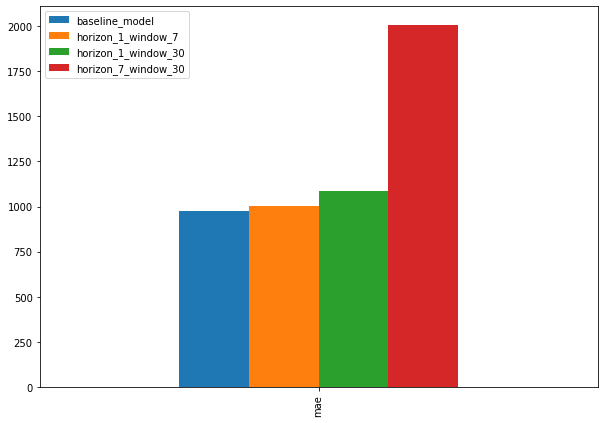

In [51]:
pd.DataFrame({"baseline_model": model_0_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D

In [52]:
HORIZON = 1
WINDOW_SIZE = 7

In [53]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3458, 3458)

In [54]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2939, 519, 2939, 519)

Now as we got our data ready, we need esure that the input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: ```(batch_size, timesteps, input_dim)```. 

Right now, our data has the `timesteps` dimension ready but we'll have to adjust it to have the `input_dim` dimension.



In [55]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To fix this, we could adjust the shape of all of our train_windows or we could use a tf.keras.layers.Lamdba (called a Lambda layer) to do this for us in our model.



In [56]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=256, kernel_size=7, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer="Adam")

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [57]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 256)            12800     
                                                                 
 dense_6 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_4.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1048.0393


1048.039306640625

In [59]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1003.1975


1003.197509765625

In [60]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)

# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

17/17 [==============================] - 0s 2ms/step


{'mae': 1003.1975,
 'mse': 2017717.5,
 'rmse': 1420.4639,
 'mape': 2.6752124,
 'mase': 1.0265474}

## Model 5: RNN (LSTM)

For this model, we are going to use the Functional API.

Also, we can use the same data that we created for the previous model.

In [61]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))

# expand input dimension to be compatible with LSTM
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 

x = layers.LSTM(128, activation="relu")(x) 

output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [62]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1050.8970


1050.89697265625

In [63]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)

model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

17/17 [==============================] - 0s 2ms/step


{'mae': 1050.8969,
 'mse': 2146789.5,
 'rmse': 1465.1926,
 'mape': 2.8112674,
 'mase': 1.075357}

## Make a multivariate time series

Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from univariate (only the historical price of Bitcoin) to multivariate (the price of Bitcoin as well as the block reward size).

In [64]:
bitcoin_prices.head()

,Price
Date,
2013-04-28,134.210007
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999


In [65]:
# Block reward values According to https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [66]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1168, 2570)

In [67]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-04-28,134.210007,25
2013-04-29,144.539993,25
2013-04-30,139.000000,25
2013-05-01,116.989998,25
2013-05-02,105.209999,25


In [68]:
bitcoin_prices_block["block_reward"].value_counts()

12.50    1402
25.00    1168
6.25      895
Name: block_reward, dtype: int64

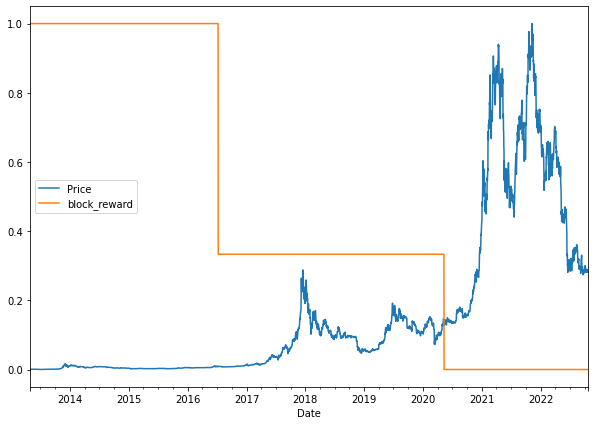

In [69]:
# Plot the block reward/price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed multivariate dataset

The functions we created eariler are bulit for univariate time series and will not work for a multivariate time series datasets. 

In [70]:
HORIZON = 1
WINDOW_SIZE = 7

In [71]:
# Create a copy of the dataset
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed = bitcoin_prices_windowed
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-04-28,134.210007,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,144.539993,25,134.210007,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,139.000000,25,144.539993,134.210007,NaN,NaN,NaN,NaN,NaN
2013-05-01,116.989998,25,139.000000,144.539993,134.210007,NaN,NaN,NaN,NaN
2013-05-02,105.209999,25,116.989998,139.000000,144.539993,134.210007,NaN,NaN,NaN
2013-05-03,97.750000,25,105.209999,116.989998,139.000000,144.539993,134.210007,NaN,NaN
2013-05-04,112.500000,25,97.750000,105.209999,116.989998,139.000000,144.539993,134.210007,NaN
2013-05-05,115.910004,25,112.500000,97.750000,105.209999,116.989998,139.000000,144.539993,134.210007
2013-05-06,112.300003,25,115.910004,112.500000,97.750000,105.209999,116.989998,139.000000,144.539993


In [72]:
# Create the X and y variable 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-05-05,25.0,112.500000,97.750000,105.209999,116.989998,139.000000,144.539993,134.210007
2013-05-06,25.0,115.910004,112.500000,97.750000,105.209999,116.989998,139.000000,144.539993
2013-05-07,25.0,112.300003,115.910004,112.500000,97.750000,105.209999,116.989998,139.000000
2013-05-08,25.0,111.500000,112.300003,115.910004,112.500000,97.750000,105.209999,116.989998
2013-05-09,25.0,113.566002,111.500000,112.300003,115.910004,112.500000,97.750000,105.209999


In [73]:
y.head()

Date
2013-05-05    115.910004
2013-05-06    112.300003
2013-05-07    111.500000
2013-05-08    113.566002
2013-05-09    112.669998
Name: Price, dtype: float32

In [74]:
# Make train and test sets
split_size = int(len(X) * 0.85)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2939, 2939, 519, 519)

In [75]:
X_train.tail()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2021-05-17,6.25,46456.058594,46760.187500,49880.535156,49716.191406,49150.535156,56704.574219,55859.796875
2021-05-18,6.25,43537.511719,46456.058594,46760.187500,49880.535156,49716.191406,49150.535156,56704.574219
2021-05-19,6.25,42909.402344,43537.511719,46456.058594,46760.187500,49880.535156,49716.191406,49150.535156
2021-05-20,6.25,37002.441406,42909.402344,43537.511719,46456.058594,46760.187500,49880.535156,49716.191406
2021-05-21,6.25,40782.738281,37002.441406,42909.402344,43537.511719,46456.058594,46760.187500,49880.535156


In [76]:
X_test.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2021-05-22,6.25,37304.691406,40782.738281,37002.441406,42909.402344,43537.511719,46456.058594,46760.187500
2021-05-23,6.25,37536.632812,37304.691406,40782.738281,37002.441406,42909.402344,43537.511719,46456.058594
2021-05-24,6.25,34770.582031,37536.632812,37304.691406,40782.738281,37002.441406,42909.402344,43537.511719
2021-05-25,6.25,38705.980469,34770.582031,37536.632812,37304.691406,40782.738281,37002.441406,42909.402344
2021-05-26,6.25,38402.222656,38705.980469,34770.582031,37536.632812,37304.691406,40782.738281,37002.441406


## Model 6: Dense (multivariate time series)

In [77]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [78]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 997.3991


997.3991088867188

In [79]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))

model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

17/17 [==============================] - 0s 2ms/step


{'mae': 997.3991,
 'mse': 1979633.9,
 'rmse': 1406.9946,
 'mape': 2.6514435,
 'mase': 1.020614}

## Model 7: N-BEATS algorithm

Replicating the model architecture in [Figure 1 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

### Building and testing an N-BEATS block layer

As the N-BEATS block layer does not exist in TensorFlow, we have to create it ourselves.

In [80]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers (Dense layers) each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

To confirm that the NBeatsBlock layer is working as intended, let's make some dummy inputs and outputs.

In [81]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [82]:
# Create dummy inputs 
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [83]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014993  0.83798355 -0.3287001   0.2515993  -0.47540283 -0.7783665
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparing data for the N-BEATS algorithm

To ensure efficency of the training of the model, we'll setup our datasets using the `tf.data` API.

In [84]:
HORIZON = 1 
WINDOW_SIZE = 7 

In [85]:
# Create NBEATS data inputs (univariate version)
bitcoin_prices.head()

,Price
Date,
2013-04-28,134.210007
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999


In [86]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats = bitcoin_prices_nbeats.dropna()
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-05-05,115.910004,112.500000,97.750000,105.209999,116.989998,139.000000,144.539993,134.210007
2013-05-06,112.300003,115.910004,112.500000,97.750000,105.209999,116.989998,139.000000,144.539993
2013-05-07,111.500000,112.300003,115.910004,112.500000,97.750000,105.209999,116.989998,139.000000
2013-05-08,113.566002,111.500000,112.300003,115.910004,112.500000,97.750000,105.209999,116.989998
2013-05-09,112.669998,113.566002,111.500000,112.300003,115.910004,112.500000,97.750000,105.209999


In [87]:
# Make features and labels
X = bitcoin_prices_nbeats.drop("Price", axis=1)
y = bitcoin_prices_nbeats["Price"]

# Make train and test sets
split_size = int(len(X) * 0.85)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2939, 2939, 519, 519)

In [88]:
X_test.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2021-05-22,37304.690671,40782.738262,37002.440466,42909.400925,43537.511389,46456.058474,46760.186561
2021-05-23,37536.631112,37304.690671,40782.738262,37002.440466,42909.400925,43537.511389,46456.058474
2021-05-24,34770.583623,37536.631112,37304.690671,40782.738262,37002.440466,42909.400925,43537.511389
2021-05-25,38705.978637,34770.583623,37536.631112,37304.690671,40782.738262,37002.440466,42909.400925
2021-05-26,38402.223851,38705.978637,34770.583623,37536.631112,37304.690671,40782.738262,37002.440466


In [89]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [90]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorathims uses double residual stacking to help train its deeper architecture (section 3.2 of the N-BEATS paper).

**Dummy tensors**

In [91]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using NBeatsBlock 

2. Create an input layer for the N-BEATS stack

3. Make the initial backcast and forecasts for the model with the layer created in (1)

4. Use a for loop to create stacks of block layers

5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts

6. Create the double residual stacking using subtract and add layers

7. Put the model inputs and outputs together using `tf.keras.Model()`

8. Compile the model with MAE loss and Adam optimizer with default settings (as per section 5.2 of N-BEATS paper)

9. Fit the N-BEATS model for 5000 epochs 

Since the model fitting for so many epochs, we'll use a couple of callbacks:
  * `tf.keras.callbacks.EarlyStopping()` - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True 

  * `tf.keras.callbacks.ReduceLROnPlateau()` - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements

In [92]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer="Adam",
                metrics=["mae"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 468: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 568: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 47s, sys: 3.27 s, total: 1min 50s
Wall time: 2min


In [93]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 16ms/step - loss: 1019.9127 - mae: 1019.9127


[1019.9127197265625, 1019.9127197265625]

In [94]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([37768.785, 37375.18 , 35206.93 , 39082.684, 37961.51 , 39056.57 ,
       38441.7  , 35962.832, 34709.13 , 34726.508], dtype=float32)>

In [95]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 1019.9127,
 'mse': 2110788.0,
 'rmse': 1452.8551,
 'mape': 2.6938412,
 'mase': 1.0436517}

In [96]:
model_0_results

{'mae': 975.8179,
 'mse': 1922027.6,
 'rmse': 1386.3721,
 'mape': 2.5841565,
 'mase': 0.9985305}

### Plotting the N-BEATS architecture

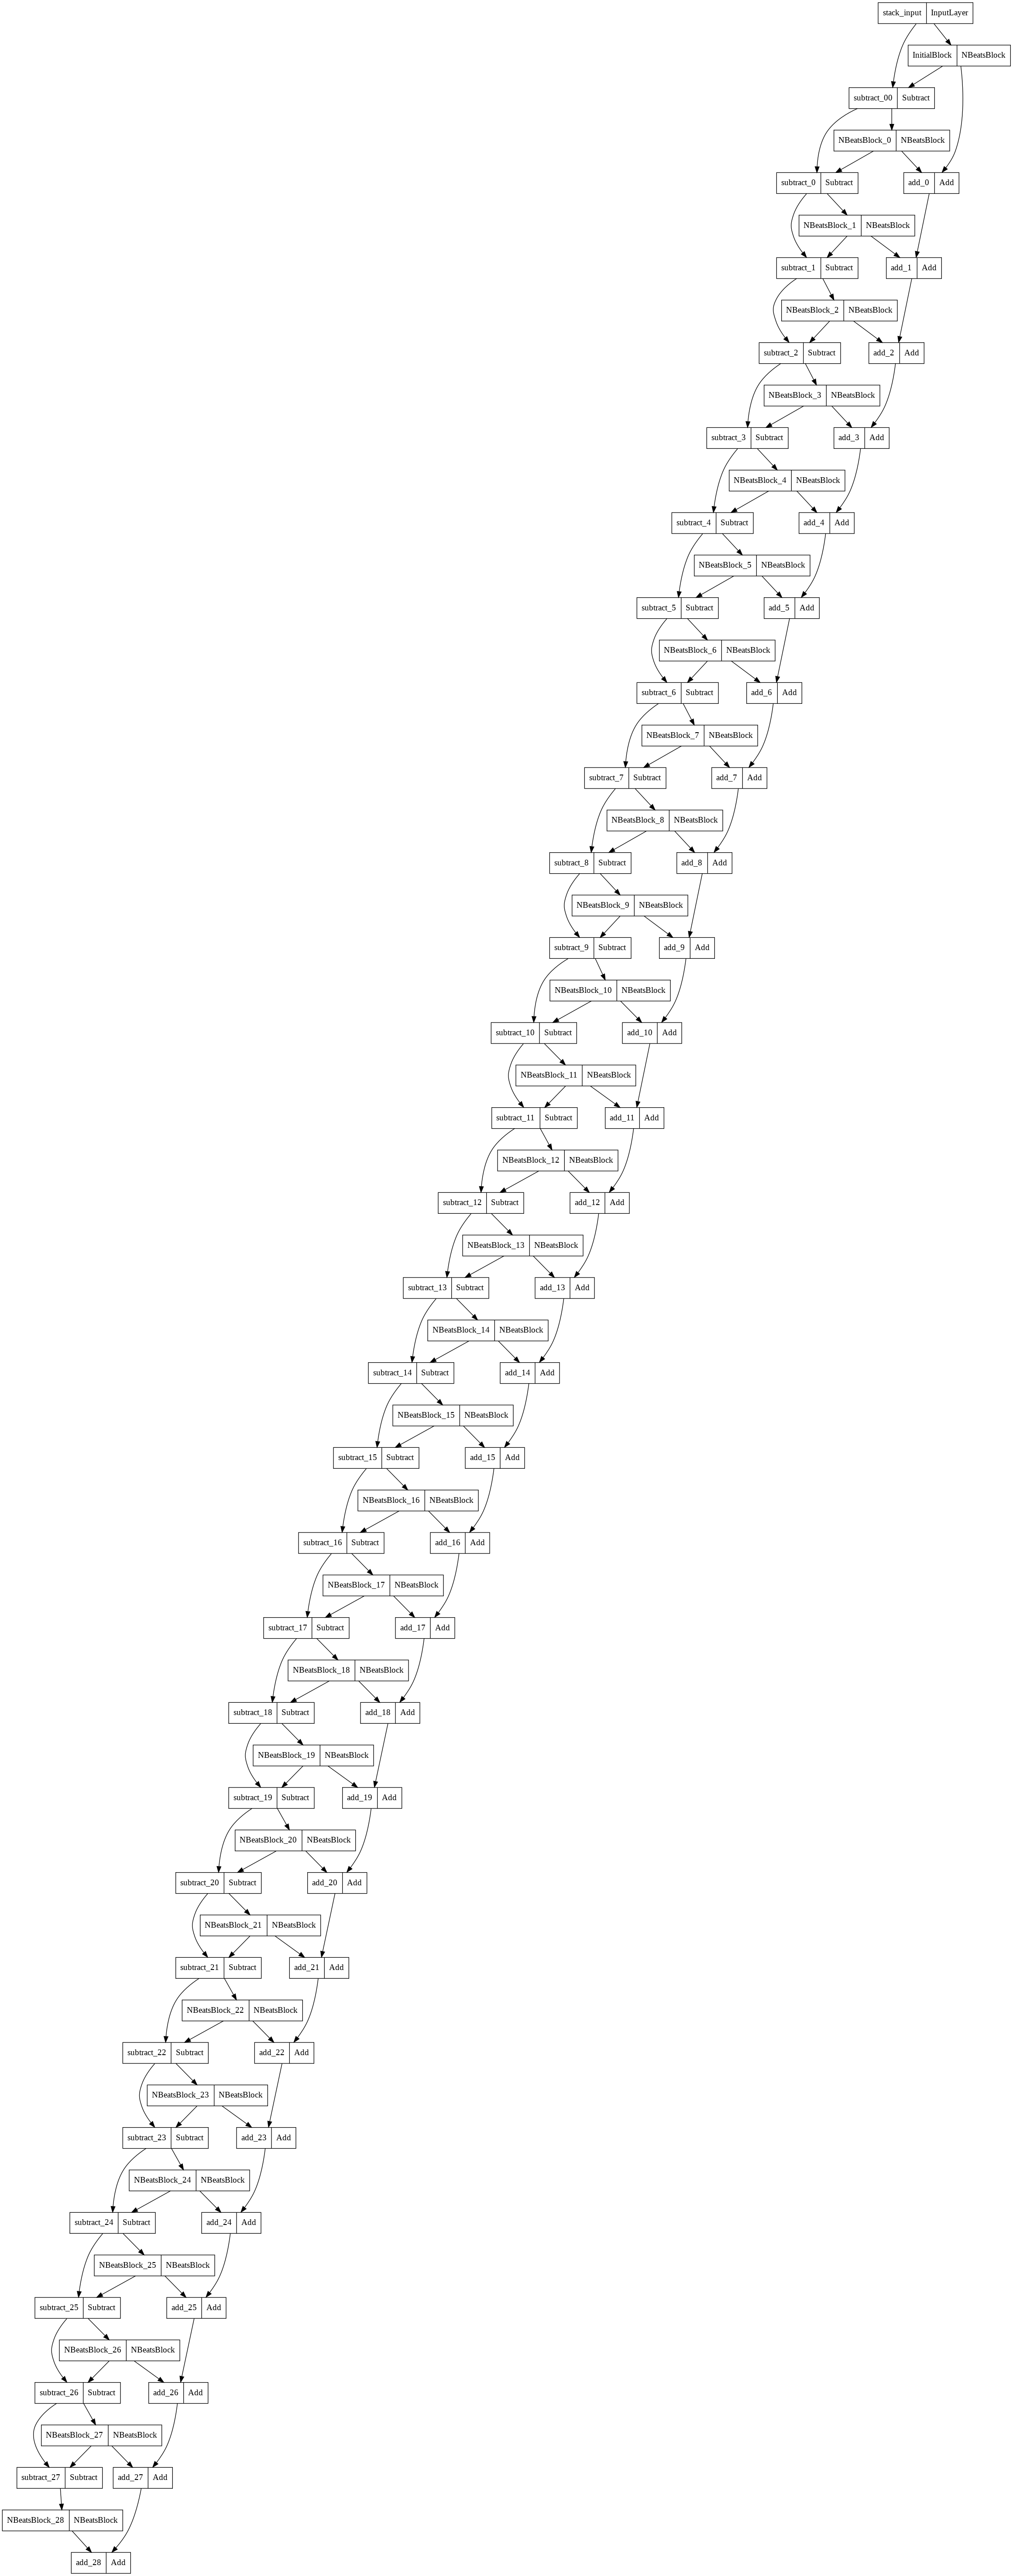

In [97]:
# Plot the N-BEATS model
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble

### Constructing and fitting an ensemble of models

In [98]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, # number of models to create per loss function
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  """

  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal distribution
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
  return ensemble_models

In [99]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5, num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 842: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 942: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 365: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 519: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 619: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 197: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 372: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 472: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 252: ReduceLROnPl

### Making predictions with an ensemble model

In [100]:
# Create a function to create predictions using the ensemble model
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data, verbose=0) 
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [101]:
# Make predictions using the function above
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 519), dtype=float32, numpy=
array([[38439.07 , 38785.31 , 35278.812, ..., 19276.406, 19115.586,
        19258.652],
       [37188.027, 37506.727, 33991.08 , ..., 19170.9  , 19043.754,
        19187.607],
       [37590.004, 37478.31 , 34922.66 , ..., 19161.57 , 18984.791,
        19164.242],
       ...,
       [37820.348, 36859.49 , 34363.086, ..., 19211.84 , 19073.496,
        19098.822],
       [36776.965, 38772.773, 33265.746, ..., 19165.19 , 18999.201,
        19144.588],
       [37093.855, 37220.16 , 34501.773, ..., 19090.742, 18966.916,
        19112.46 ]], dtype=float32)>

In [102]:
# Evaluate ensemble model predictions
ensemble_median_results = evaluate_preds(y_true=y_test,
                                         y_pred=np.median(ensemble_preds, axis=0))
ensemble_median_results

{'mae': 984.69525,
 'mse': 1966988.5,
 'rmse': 1402.4937,
 'mape': 2.613448,
 'mase': 1.0076145}

In [103]:
# Evaluate ensemble model predictions
ensemble_mean_results = evaluate_preds(y_true=y_test,
                                       y_pred=np.mean(ensemble_preds, axis=0)) 
ensemble_mean_results

{'mae': 994.24164,
 'mse': 1983433.5,
 'rmse': 1408.3442,
 'mape': 2.6300519,
 'mase': 1.0173831}

In [104]:
model_1_results

{'mae': 1001.01807,
 'mse': 2015773.6,
 'rmse': 1419.7794,
 'mape': 2.6634963,
 'mase': 1.0243173}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

Instead of predicting a value, predicting a range might make better decisions for the forecast.

One way of getting high condfidnece prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models

2. Measure the standard deviation of the predictions

3. Multiply standard deviation by 1.96 (as we are working with normal distribution, it will return 95% confidence)

4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)


In [105]:
# Find the bounds of the ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [106]:
# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:5], upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([35265.1  , 36014.94 , 32165.877, 36755.47 , 35594.35 ],
       dtype=float32)>, <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([39248.727, 39107.63 , 36495.82 , 39475.562, 40877.57 ],
       dtype=float32)>)

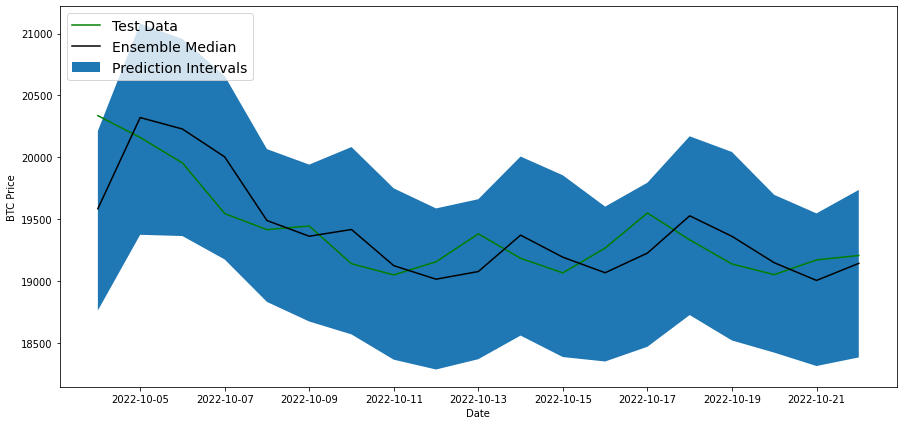

In [107]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(15, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], (lower)[offset:], (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model 9: model to predict the future

For the past experiments, we were predicting a pseudo future.

To make a model that is capable of predicting the future, we'll train a model on the full dataset and then get to make predictions to some future horizon.

In [108]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-04-28,134.210007,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,144.539993,25,134.210007,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,139.000000,25,144.539993,134.210007,NaN,NaN,NaN,NaN,NaN
2013-05-01,116.989998,25,139.000000,144.539993,134.210007,NaN,NaN,NaN,NaN
2013-05-02,105.209999,25,116.989998,139.000000,144.539993,134.210007,NaN,NaN,NaN


In [110]:
# Create the X and y variables that contains the entire dataset 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(3458, 3458)

In [111]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [112]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss="mae",
                optimizer="Adam")

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [113]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

Alright, let's create a function which returns `INTO_FUTURE` forecasted values using a trained model.

To do so, we'll build the following steps:

1. Function which takes as input:
  * A list of values (the Bitcoin historical data)

  * A trained model (such as model_9)
  * A window into the future to predict (our INTO_FUTURE variable)
  * The window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values.

3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the 
value and append the latest prediction.
  * Eventually future predictions will be made using the model's own previous predictions as input









In [114]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future=INTO_FUTURE, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it over and over again
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [115]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9)

1/1 [==============================] - 0s 100ms/step
Predicting on: 
 [19268.09280086 19550.75729991 19334.41514998 19139.53435139
 19053.74024054 19172.46921727 19208.190246  ] -> Prediction: 19178.337890625

1/1 [==============================] - 0s 34ms/step
Predicting on: 
 [19550.75729991 19334.41514998 19139.53435139 19053.74024054
 19172.46921727 19208.190246   19178.33789062] -> Prediction: 19226.09375

1/1 [==============================] - 0s 25ms/step
Predicting on: 
 [19334.41514998 19139.53435139 19053.74024054 19172.46921727
 19208.190246   19178.33789062 19226.09375   ] -> Prediction: 19058.025390625

1/1 [==============================] - 0s 23ms/step
Predicting on: 
 [19139.53435139 19053.74024054 19172.46921727 19208.190246
 19178.33789062 19226.09375    19058.02539062] -> Prediction: 18966.982421875

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [19053.74024054 19172.46921727 19208.190246   19178.33789062
 19226.09375    19058.02539062 18966.98

### Plot future forecasts

In [116]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [118]:
# Last timestep of timesteps
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-10-22 00:00:00')

In [119]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
       '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30',
       '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
       '2022-11-04', '2022-11-05'], dtype='datetime64[D]')

In [120]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
        '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
        '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
        '2022-11-03', '2022-11-04', '2022-11-05'], dtype='datetime64[D]'),
 array([19208.19 , 19178.338, 19226.094, 19058.025, 18966.982, 18961.31 ,
        19043.617, 19031.969, 18991.826, 18957.33 , 18857.701, 18827.014,
        18842.99 , 18874.559, 18835.432], dtype=float32))

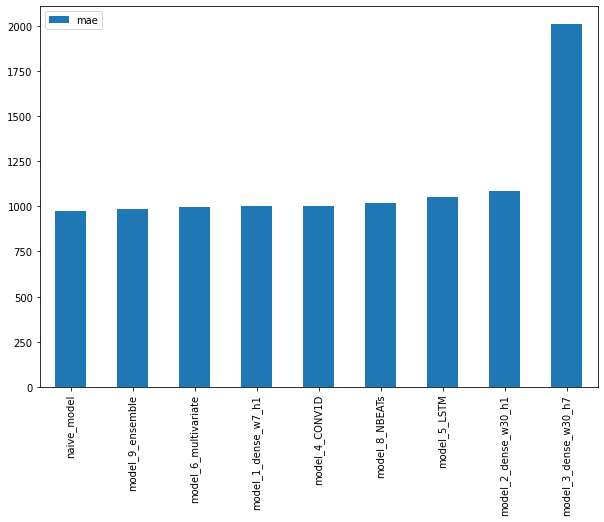

In [129]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": model_0_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_median_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");                              

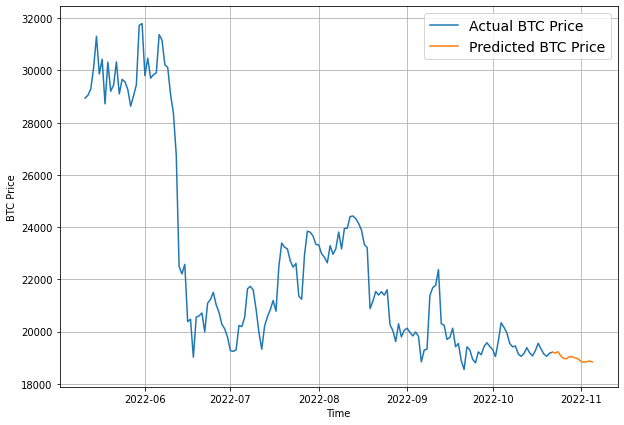

In [128]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
offset=400
plot_time_series(bitcoin_prices.index, prices, start=3300, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")